Diese Datei dient zur Datenbereinigung von NULL Werten oder Placeholder in den Excel-Dateien

Schritt 1: Die gebrauchten Abhängigkeiten laden

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from tkinter.messagebox import Message
import seaborn as sns

Schritt 2: Die Dateien laden

In [25]:
df = pd.read_excel(askopenfilename())

Schritt 3: Informationen über die geladene Datei anzeigen: 

In [7]:
# print(df.head(10))

In [8]:
# print(df.info)

Datentypen ausgeben:

In [9]:
# print(df.dtypes)

Schritt 4: Funktionen zur Visualisierung der NULL und Dummy-Werte

In [48]:
#df.loc[1:, "TODO"] = df.loc[1: ,"TODO"].astype(float)


In [26]:
def df_if_null(df):

    plt.figure(figsize=(12,8))
    sns.heatmap(df.isnull(), cbar=False, cmap="cividis", yticklabels=False)
    
    plt.title("Heatmap der Null-Werte im DataFrame", fontsize=16)
    plt.xlabel("Spalten", fontsize=12)
    plt.ylabel("Zeilen", fontsize=12)
    plt.show()
        

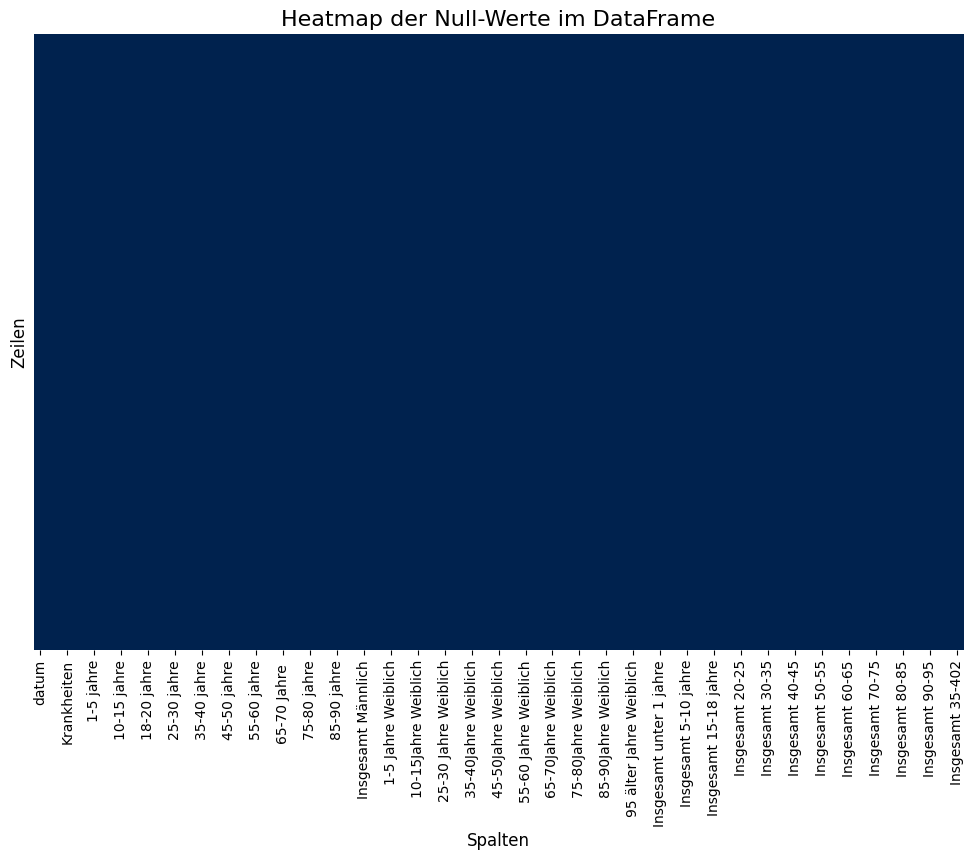

In [34]:
df_if_null(df)

In [28]:
def df_if_dummy(df, dummy_val):

    contains_dash = df.astype(str).applymap(lambda x: dummy_val in x)
    
    # Heatmap erstellen
    plt.figure(figsize=(12, 8))
    sns.heatmap(contains_dash, cbar=False, cmap="cividis", yticklabels=False)
    
    # Titel und Achsenbeschriftungen hinzufügen
    plt.title("Heatmap der Werte mit Dummys im DataFrame", fontsize=16)
    plt.xlabel("Spalten", fontsize=12)
    plt.ylabel("Zeilen", fontsize=12)
    plt.show()

/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_15530/2276706382.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contains_dash = df.astype(str).applymap(lambda x: dummy_val in x)


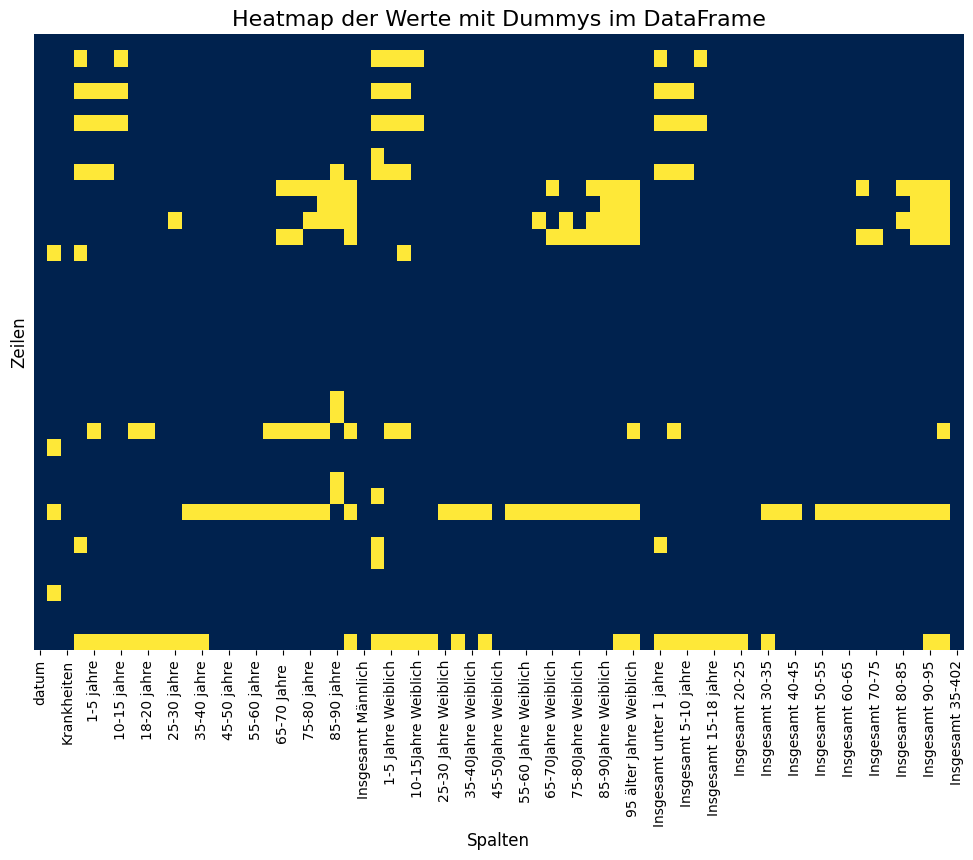

In [35]:
df_if_dummy(df, "-")

Schritt 5: Dummy und Null werte manuell oder per Funktion ersetzen

Dummys:

Speichern einer Spalte, welche nicht verändert werden soll

In [53]:
def safe_column(df, name):
    df_column = df.pop(name)
    return df_column

# df_column = safe_column(df, "TODO")

Dummys ersetzen

In [ ]:

def replace_dummies(df, dummy_val, new_val):
    df = df.replace(dummy_val, new_val)
    return df

# df = replace_dummies(df, "TODO", 0)


/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_7642/4293984147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(dummy_val, new_val)


Spalte wieder einfügen

In [55]:
def insert_column(df, df_column, pos, name):
    df.insert(pos, name, df_column)
    return df

# df = insert_column(df, df_column, 3, "TODO")

In [3]:
# df_if_dummy(df,"-")

Null-Werte:

In [4]:
# df_if_null(df)

Spalte rausnehmen

In [31]:
def drop_axis(df, name):
    df.drop(name, axis=1, inplace=True)
    return df

df = drop_axis(df, "18-20 Jahre Weiblich")

In [ ]:
def drop_row(df, name_column, row):
    df.drop(df[name_column].str.contains(row, case=False, na=False))

In [5]:
# df_if_null(df)

Spalte mit Median der selben Spalte auffüllen

In [ ]:
def fill_axis(df, name, zeile_von=0, zeile_bis=0):
    if zeile_von == 0 and zeile_bis == 0:
        median = df[name].median()
        df[name].fillna(median, inplace=True)

    else:
        zeile_von -= 1
        zeile_bis -= 1

        # Berechne den Median nur für numerische Werte
        median_spec = df.loc[zeile_von:zeile_bis, name].median()
        print(f"Der Median für den spezifizierten Bereich ist: {median_spec}")
        
        # Fülle NaN-Werte im angegebenen Bereich mit dem berechneten Median
        df[name].fillna(median_spec, inplace=True)

    return df
    
# df = fill_axis(df, "TODO", 1, 1621)

Der Median für den spezifizierten Bereich ist: 14.0


/var/folders/jp/mvl5k93n6r7d_twnt5jwf1780000gn/T/ipykernel_7642/1981674296.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(median_spec, inplace=True)


In [6]:
# df_if_null(df)

In [38]:
df.to_excel("data_patienten_diagnose_2018_final.xlsx", index=False)

: 